<a href="https://www.kaggle.com/code/rakeshrk07/accident-dataset-eda-plotly-folium?scriptVersionId=158357252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-crash-dataset/new dataset.xlsx
/kaggle/input/car-crash-dataset/monroe county car crach 2003-2015.csv


![](https://i.postimg.cc/K80J6hwn/8c9c83af-8eba-4309-a97a-0e90f69db964.jpg)

# **Lets Simply deep dive into the data**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/car-crash-dataset/monroe county car crach 2003-2015.csv', encoding='latin-1')
df

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [6]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

There are many missing value in Primary_Location 

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import plotly.express as px

> Plotly is a cool tool in Python for making interactive charts and graphs. It helps you visualize data in a way that's easy to understand. You can create different types of charts, and it even lets you play around with your graphs, like zooming in or moving things around. It's handy for showing off your data to others or exploring it yourself.

## **Analysis of Accident Causes**

In [9]:
primary_factor_count=df['Primary Factor'].value_counts().reset_index()
primary_factor_count

,Primary Factor,count
0,FAILURE TO YIELD RIGHT OF WAY,11193
1,FOLLOWING TOO CLOSELY,7359
2,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,6158
3,UNSAFE BACKING,5188
4,RAN OFF ROAD RIGHT,2925
5,DISREGARD SIGNAL/REG SIGN,2206
6,SPEED TOO FAST FOR WEATHER CONDITIONS,1921
7,IMPROPER TURNING,1843
8,ANIMAL/OBJECT IN ROADWAY,1688
9,DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,1656


In [10]:
fig=px.bar(primary_factor_count,y='count',x='Primary Factor',color='count')
fig.show()

#### The plot clearly indicates that the main reason for accidents is "Failure to yield right of way." This refers to a traffic violation where a driver doesn't give the necessary right of way to another vehicle or pedestrian, as mandated by traffic laws.

## **Analyzing Accidents on a Yearly Basis**

In [11]:
Yearwise_collision_typecount=df.groupby(by=['Year','Collision Type']).size().reset_index(name='Count')
Yearwise_collision_typecount

,Year,Collision Type,Count
0,2003,1-Car,814
1,2003,2-Car,3369
2,2003,3+ Cars,297
3,2003,Bus,82
4,2003,Cyclist,2
...,...,...,...
86,2015,3+ Cars,232
87,2015,Bus,80
88,2015,Cyclist,36
89,2015,Moped/Motorcycle,53


In [12]:
fig=px.line(Yearwise_collision_typecount,x='Year',y='Count',color='Collision Type',title='Yearwise Collision Type Analysis')
fig.show()

## **Analyzing Accidents on a Weekly Basis**

In [13]:
Weekwise_analysis=pd.DataFrame(df['Weekend?'].value_counts()).reset_index()
Weekwise_analysis

,Weekend?,count
0,Weekday,40604
1,Weekend,13271


In [14]:
fig=px.pie(Weekwise_analysis,values='count',names='Weekend?')
fig.show()

#### Observation- Almost 75 % of accidents occurs on weekdays

In [15]:
Weekend_collsion_group=df.groupby(by=['Weekend?','Collision Type']).size().reset_index(name='Count')
Weekend_collsion_group

,Weekend?,Collision Type,Count
0,Weekday,1-Car,7038
1,Weekday,2-Car,28815
2,Weekday,3+ Cars,2490
3,Weekday,Bus,747
4,Weekday,Cyclist,376
5,Weekday,Moped/Motorcycle,683
6,Weekday,Pedestrian,450
7,Weekend,1-Car,3194
8,Weekend,2-Car,8740
9,Weekend,3+ Cars,660


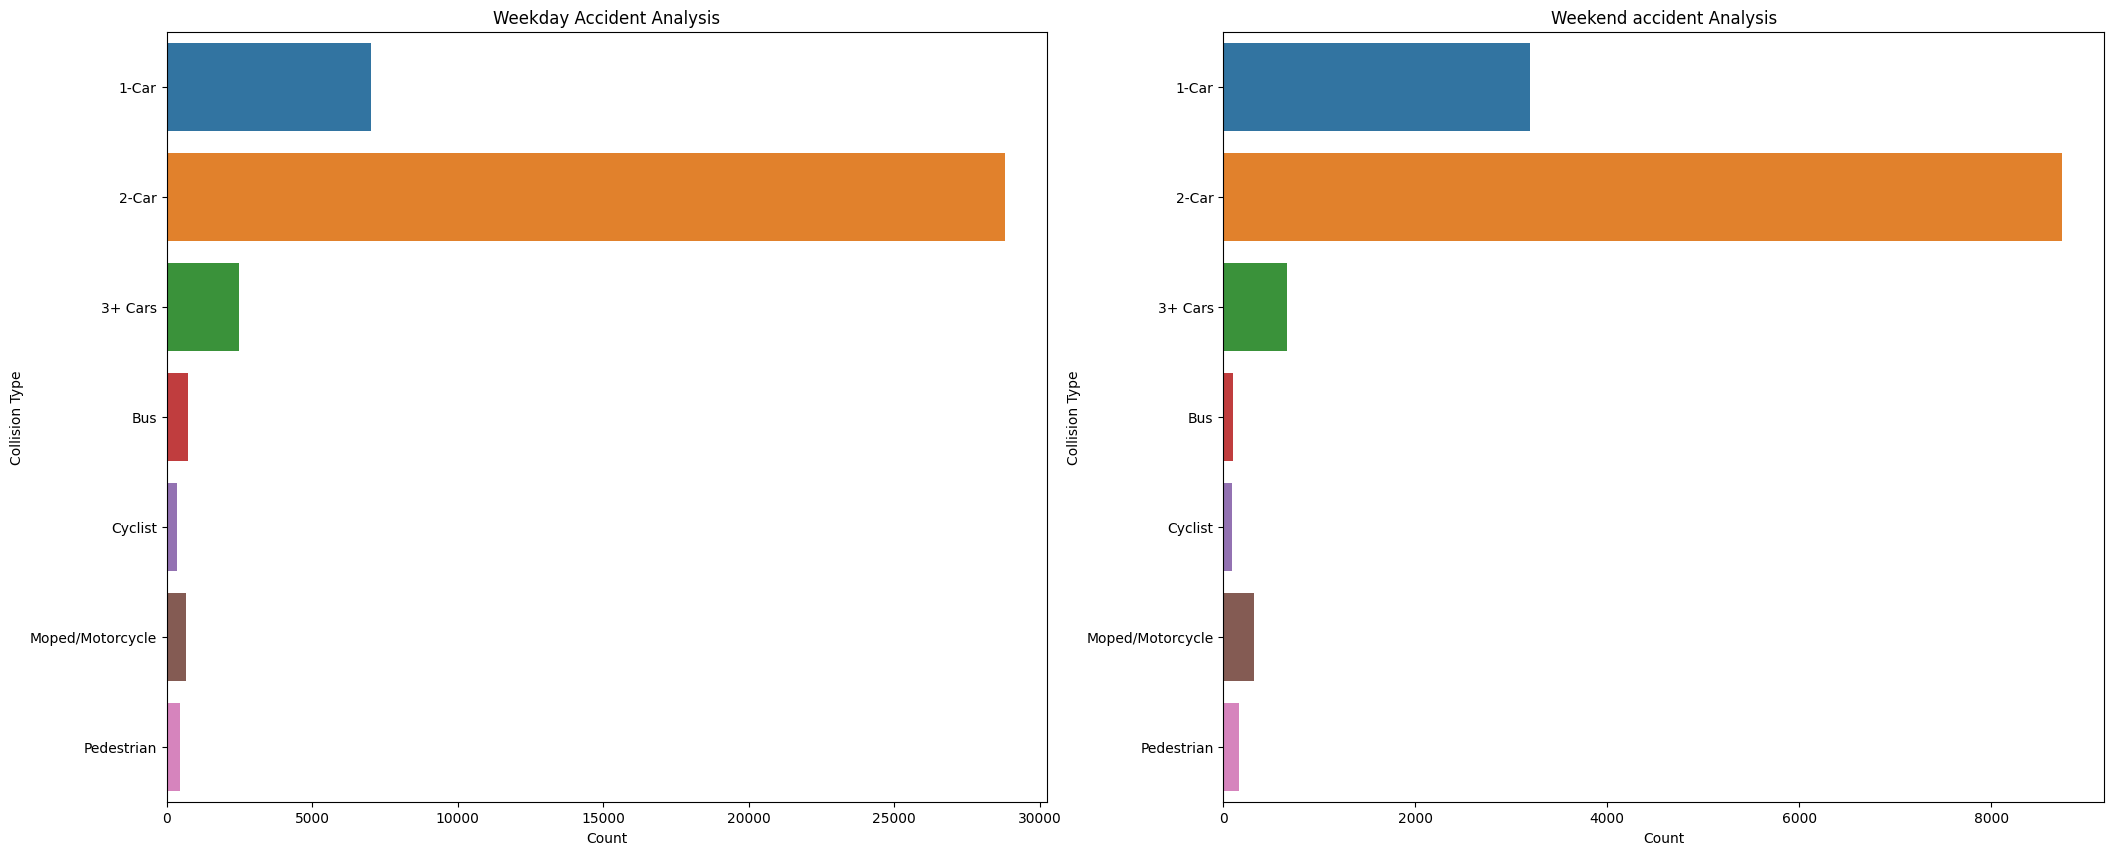

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

sns.barplot(Weekend_collsion_group[Weekend_collsion_group['Weekend?']=='Weekday'],x='Count',y='Collision Type',ax=axes[0])
axes[0].set_title('Weekday Accident Analysis')

sns.barplot(Weekend_collsion_group[Weekend_collsion_group['Weekend?']=='Weekend'],x='Count',y='Collision Type',ax=axes[1])
axes[1].set_title('Weekend accident Analysis')

plt.show()

## **Hourly Distribution of Accidents**

In [17]:
df['Hour']=df['Hour']/100
df.sample(2)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
26901,2009,1,6,Weekday,18.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,3RD ST & CLARIZZ,39.16424,-86.490800
5044,2014,2,7,Weekend,1.0,1-Car,No injury/unknown,RAN OFF ROAD RIGHT,17TH & SR46S,39.17984,-86.507088


In [18]:
time_analysis=pd.DataFrame(df['Hour'].value_counts()).reset_index()
time_analysis

,Hour,count
0,17.0,4631
1,16.0,4488
2,15.0,4283
3,12.0,3819
4,14.0,3750
5,13.0,3526
6,18.0,3232
7,11.0,3040
8,19.0,2442
9,10.0,2360


In [19]:
fig=px.bar(time_analysis,x='Hour',y='count',color='count',title='Hourly Distribution of Accidents')
fig.show()

#### Peak Accident Hours: 10 AM to 6 PM

## **Monthly Distribution of Accidents**

In [20]:
monthwise_count=pd.DataFrame(df.groupby(by='Month').agg({'Year':'count'}).reset_index())
monthwise_count.rename(columns={'Year':'Count'},inplace=True)
monthwise_count

,Month,Count
0,1,4665
1,2,4541
2,3,3842
3,4,4574
4,5,4212
5,6,3752
6,7,3820
7,8,4480
8,9,4994
9,10,5581


In [21]:
fig=px.bar(monthwise_count,x='Month',y='Count',color='Count')
fig.show()

## **Collision Type Distribution**

In [22]:
collision_type_count=df['Collision Type'].value_counts().reset_index()
collision_type_count

,Collision Type,count
0,2-Car,37606
1,1-Car,10245
2,3+ Cars,3152
3,Moped/Motorcycle,1007
4,Bus,850
5,Pedestrian,609
6,Cyclist,468


In [23]:
fig=px.bar(collision_type_count,y='Collision Type',x='count',color='count')
fig.show()

#### Majority of the collisions involved two cars

## **Injury Type Analysis**

In [24]:
df['Injury Type'].value_counts().reset_index()

,Injury Type,count
0,No injury/unknown,41603
1,Non-incapacitating,11136
2,Incapacitating,1089
3,Fatal,115


In [25]:
px.pie(df['Injury Type'].value_counts().reset_index(),names='Injury Type',values='count')

In [26]:
collision_injury_counts=df.groupby(by=['Collision Type','Injury Type']).size().reset_index(name='Count')
collision_injury_counts

,Collision Type,Injury Type,Count
0,1-Car,Fatal,49
1,1-Car,Incapacitating,205
2,1-Car,No injury/unknown,7854
3,1-Car,Non-incapacitating,2137
4,2-Car,Fatal,31
5,2-Car,Incapacitating,451
6,2-Car,No injury/unknown,30807
7,2-Car,Non-incapacitating,6317
8,3+ Cars,Fatal,5
9,3+ Cars,Incapacitating,116


In [27]:
injury_type=list(df['Injury Type'].unique())
injury_type

['No injury/unknown', 'Non-incapacitating', 'Incapacitating', 'Fatal']

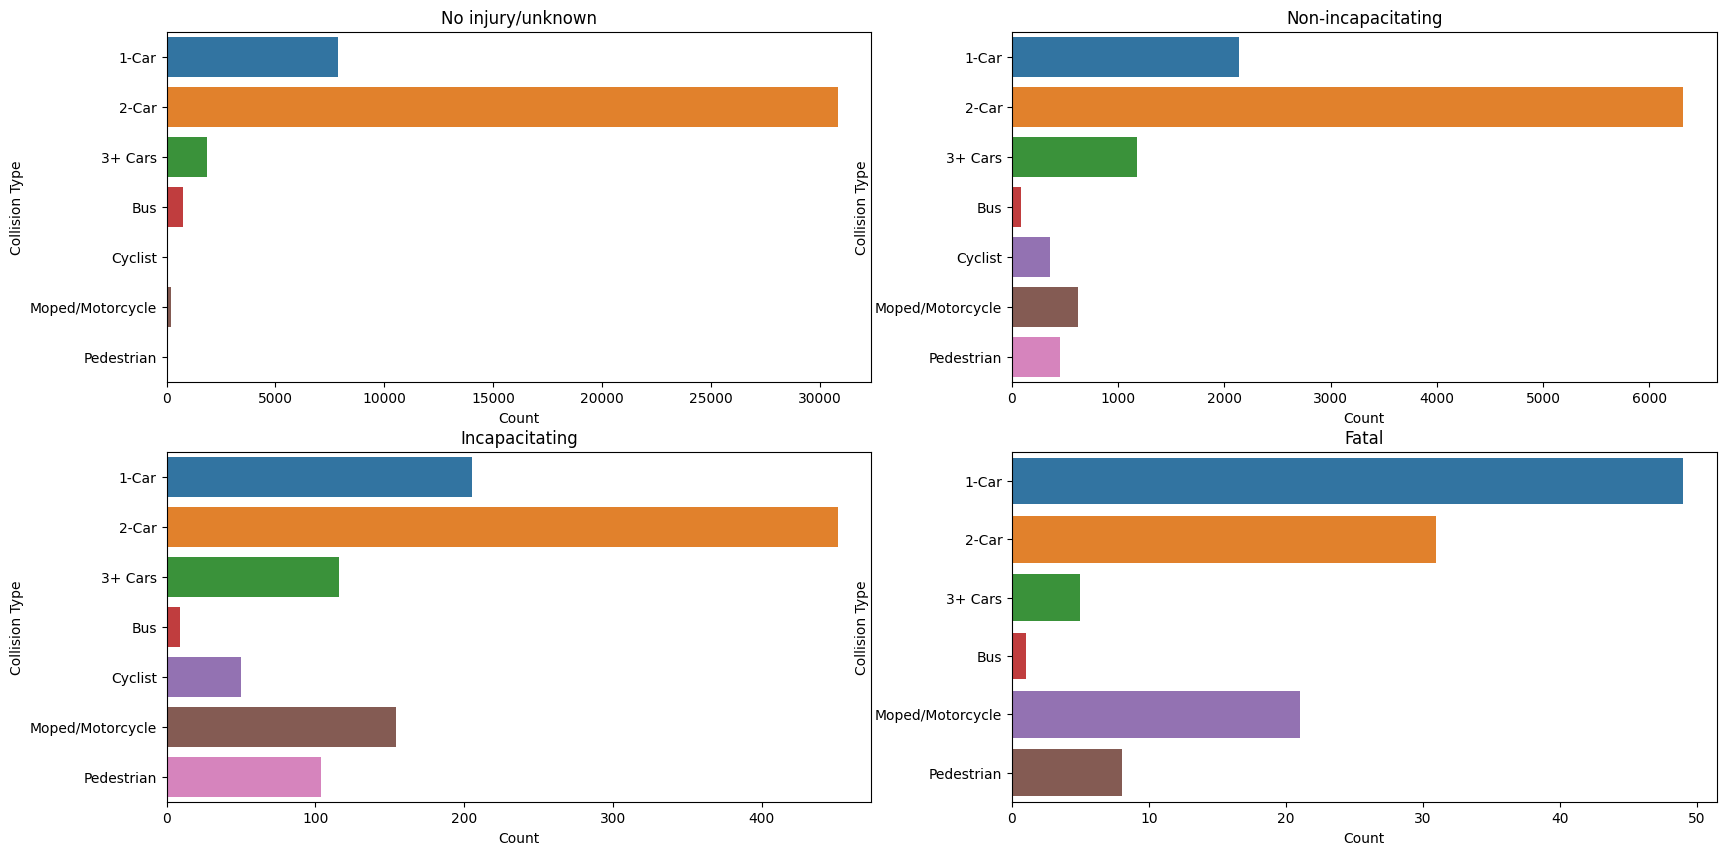

In [28]:
fig , axes= plt.subplots(nrows=2 ,ncols=2 ,figsize=(20,10))
for i,injury in enumerate(injury_type):
    row=i//2
    col=i%2
    temp_df=collision_injury_counts[collision_injury_counts['Injury Type']==injury]
    sns.barplot(temp_df,x='Count',y='Collision Type',ax=axes[row,col])
    axes[row,col].set_title(injury)
    

## **Accident Location Analysis**

In [29]:
location_count=df.groupby(by=['Latitude','Longitude']).size().reset_index(name='Count')
location_count

,Latitude,Longitude,Count
0,0.000000,0.000000,4908
1,1.000000,1.000000,23
2,9.133739,-86.582651,1
3,9.183292,-86.511723,1
4,38.019328,-87.635098,1
...,...,...,...
19393,40.510383,-88.955391,2
19394,40.604666,-86.866406,1
19395,40.615528,-87.313484,2
19396,40.899241,-85.513866,1


In [30]:
data=[]
for i in range(19398):
    data.append((location_count.iloc[i][0],location_count.iloc[i][1],location_count.iloc[i][2]))

    

In [31]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [32]:
import folium
from folium.plugins import HeatMap
map_center = [sum(x[0] for x in data) / len(data),
              sum(x[1] for x in data) / len(data)]
my_map = folium.Map(location=map_center, zoom_start=4)
HeatMap(data=data, radius=15).add_to(my_map)
my_map.save("accident_intensity_map.html")
my_map


![](https://i.postimg.cc/C1bcRBrg/stock-vector-thank-you-handwritten-isolated-on-white-background-hand-drawn-lettering-style-one-line.jpg)